In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/survey.csv')

# Check the first few rows of the dataframe
print(df.head())

   index            Timestamp  Age  Gender         Country state  \
0      0  2014-08-27 11:29:31   37  Female   United States    IL   
1      1  2014-08-27 11:29:37   44       M   United States    IN   
2      2  2014-08-27 11:29:44   32    Male          Canada   NaN   
3      3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN   
4      4  2014-08-27 11:30:22   31    Male   United States    TX   

  self_employed family_history treatment work_interfere  ...  \
0           NaN             No       Yes          Often  ...   
1           NaN             No        No         Rarely  ...   
2           NaN             No        No         Rarely  ...   
3           NaN            Yes       Yes          Often  ...   
4           NaN             No        No          Never  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe         

In [ ]:
columns_to_fill = [
    'work_interfere'
]

df[columns_to_fill] = df[columns_to_fill].fillna("NaN")

In [ ]:
# This will show the total number of missing values per column
print(df.isnull().sum())

index                           0
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [ ]:
# STEP 1: Define the features you want to keep
features_to_keep = [
    # Add the feature names you want to retain here
    'family_history',
    'work_interfere',
    'mental_health_consequence',
    'obs_consequence',
    'mental_vs_physical',
    'mental_health_interview',
    'benefits',
    'seek_help',
    'care_options',
    'wellness_program',
    'leave',
    'remote_work',
    'coworkers',
    'supervisor',
    'anonymity',
    'tech_company',
    'no_employees',
    'treatment'
]

# STEP 2: Keep only the selected features
df = df[features_to_keep]

# STEP 3: Verify the result
print("Remaining columns:", df.columns.tolist())
print(df.head())


Remaining columns: ['family_history', 'work_interfere', 'mental_health_consequence', 'obs_consequence', 'mental_vs_physical', 'mental_health_interview', 'benefits', 'seek_help', 'care_options', 'wellness_program', 'leave', 'remote_work', 'coworkers', 'supervisor', 'anonymity', 'tech_company', 'no_employees', 'treatment']
  family_history work_interfere mental_health_consequence obs_consequence  \
0             No          Often                        No              No   
1             No         Rarely                     Maybe              No   
2             No         Rarely                        No              No   
3            Yes          Often                       Yes             Yes   
4             No          Never                        No              No   

  mental_vs_physical mental_health_interview    benefits   seek_help  \
0                Yes                      No         Yes         Yes   
1         Don't know                      No  Don't know  Don't know  

In [ ]:
def predict_likely_depressed(row):
    score = 0

    if row['work_interfere'] in ['Sometimes', 'Often']:
        score += 2
    if row['mental_health_consequence'] in ['Yes', 'Maybe'] :
        score += 2
    if row['care_options'] in ['No', 'Not sure']:
        score += 2
    if row['benefits'] == 'No':
        score += 2
    if row['seek_help'] == 'No':
        score += 2
    if row['mental_vs_physical'] == 'Yes':
        score += 2
    if row['family_history'] == 'Yes':
        score += 2

    if row['wellness_program'] == 'No' :
        score += 1
    if row['supervisor'] == 'No':
        score += 1
    if row['coworkers'] == 'No':
        score += 1
    if row['leave'] in ['Very difficult', 'Somewhat difficult']:
        score += 1
    if row['mental_health_interview'] in ['Yes', 'Maybe']:
        score += 1

    if row['anonymity'] == 'No':
        score += 0.5
    if row['obs_consequence'] == 'Yes':
        score += 0.5
    if row['remote_work'] == 'No':
        score += 0.5
    if row['tech_company'] == 'Yes':
        score += 0.5

    return score


In [ ]:
df['depression_score'] = df.apply(predict_likely_depressed, axis=1)

In [ ]:
df['likely_depressed'] = df['depression_score'].apply(lambda x: 1 if x > 10 else 0)

In [ ]:
df.head(15)

,family_history,work_interfere,mental_health_consequence,obs_consequence,mental_vs_physical,mental_health_interview,benefits,seek_help,care_options,wellness_program,leave,remote_work,coworkers,supervisor,anonymity,tech_company,no_employees,treatment,depression_score,likely_depressed
0,No,Often,No,No,Yes,No,Yes,Yes,Not sure,No,Somewhat easy,No,Some of them,Yes,Yes,Yes,6-25,Yes,8.0,0
1,No,Rarely,Maybe,No,Don't know,No,Don't know,Don't know,No,Don't know,Don't know,No,No,No,Don't know,No,More than 1000,No,6.5,0
2,No,Rarely,No,No,No,Yes,No,No,No,No,Somewhat difficult,No,Yes,Yes,Don't know,Yes,6-25,No,10.0,0
3,Yes,Often,Yes,Yes,No,Maybe,No,No,Yes,No,Somewhat difficult,No,Some of them,No,No,Yes,26-100,Yes,16.0,1
4,No,Never,No,No,Don't know,Yes,Yes,Don't know,No,Don't know,Don't know,Yes,Some of them,Yes,Don't know,Yes,100-500,No,3.5,0
5,Yes,Sometimes,No,No,Don't know,No,Yes,Don't know,Not sure,No,Don't know,No,Yes,Yes,Don't know,Yes,6-25,No,8.0,0
6,Yes,Sometimes,Maybe,No,Don't know,No,No,No,No,No,Somewhat difficult,Yes,Some of them,No,No,Yes,1-5,Yes,16.0,1
7,No,Never,No,No,No,No,No,No,Yes,No,Don't know,Yes,No,No,Yes,Yes,1-5,No,7.5,0
8,Yes,Sometimes,Maybe,No,No,No,Yes,No,Yes,No,Very difficult,No,Yes,Yes,No,Yes,100-500,Yes,11.5,1
9,No,Never,No,No,Yes,Maybe,Don't know,Don't know,No,Don't know,Don't know,No,Yes,Yes,Don't know,Yes,26-100,No,6.0,0


In [ ]:
def label_risk(row):
    if row['likely_depressed'] == 1 and row['treatment'] == 'No':
        return 'High Risk'
    elif row['likely_depressed'] == 1 and row['treatment'] == 'Yes':
        return 'Treated'
    else:
        return 'Low/No Risk'

df['risk_group'] = df.apply(label_risk, axis=1)

# Check group sizes
print(df['risk_group'].value_counts())


risk_group
Low/No Risk    858
Treated        260
High Risk      141
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare your features and targets
features = df.drop(columns=['depression_score', 'likely_depressed', 'treatment', 'risk_group'])
X_encoded = pd.get_dummies(features)  # One-hot encode categorical vars

# Targets
y_depressed = df['likely_depressed']
le_treatment = LabelEncoder()
y_treatment = le_treatment.fit_transform(df['treatment'])  # 'Yes'/'No' to 1/0

le_risk = LabelEncoder()
y_risk = le_risk.fit_transform(df['risk_group'])  # 'High Risk', 'Treated', etc.

# Split ONCE
X_train, X_test, y_depressed_train, y_depressed_test, y_risk_train, y_risk_test = train_test_split(
    X_encoded, y_depressed, y_risk, test_size=0.3, random_state=42, stratify=y_risk
)



In [ ]:
import numpy as np

# Count how many individuals are labeled as 'likely depressed' (assuming label 1 means depressed)
num_depressed = np.sum(y_depressed_test == 1)

# Optionally, print total for reference
total_test_samples = len(y_depressed_test)

print(f"Number of likely depressed individuals in test data: {num_depressed}")
print(f"Out of total test samples: {total_test_samples}")


Number of likely depressed individuals in test data: 120
Out of total test samples: 378


=== Depression Classifier ===
Accuracy: 0.9126984126984127
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       258
           1       0.95      0.77      0.85       120

    accuracy                           0.91       378
   macro avg       0.92      0.87      0.89       378
weighted avg       0.92      0.91      0.91       378



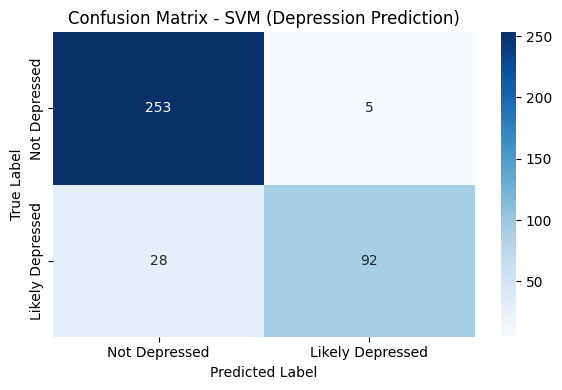

In [ ]:
# Train classifier for likely_depressed
clf_depressed = RandomForestClassifier(random_state=42)
clf_depressed.fit(X_train, y_depressed_train)
y_depressed_pred = clf_depressed.predict(X_test)

print("=== Depression Classifier ===")
print("Accuracy:", accuracy_score(y_depressed_test, y_depressed_pred))
print("Classification Report:\n", classification_report(y_depressed_test, y_depressed_pred))
cm = confusion_matrix(y_depressed_test, y_depressed_pred)
labels = le_depression.classes_ if 'le_depression' in locals() else ['Not Depressed', 'Likely Depressed']

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - SVM (Depression Prediction)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Depression Classifier ===
Accuracy: 0.9470899470899471
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       258
           1       0.92      0.92      0.92       120

    accuracy                           0.95       378
   macro avg       0.94      0.94      0.94       378
weighted avg       0.95      0.95      0.95       378



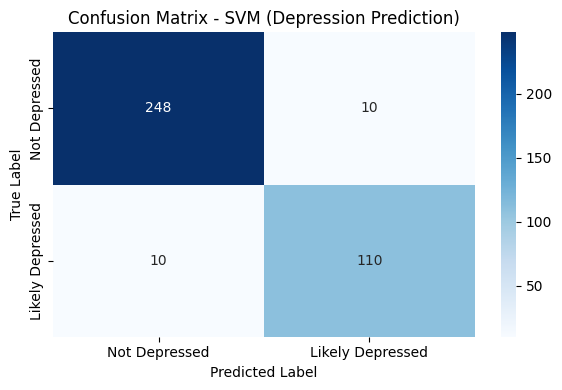

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier with a balanced class weight
clf_risk_svm = SVC(random_state=42, class_weight='balanced')

# Train the SVM classifier
clf_risk_svm.fit(X_train, y_depressed_train)

# Make predictions
y_depressed_pred_svm = clf_risk_svm.predict(X_test)

print("=== Depression Classifier ===")
print("Accuracy:", accuracy_score(y_depressed_test, y_depressed_pred_svm))
print("Classification Report:\n", classification_report(y_depressed_test, y_depressed_pred_svm))
cm = confusion_matrix(y_depressed_test, y_depressed_pred_svm)
labels = le_depression.classes_ if 'le_depression' in locals() else ['Not Depressed', 'Likely Depressed']

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - SVM (Depression Prediction)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Depression Classifier ===
Accuracy: 0.9841269841269841
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       258
           1       0.99      0.96      0.97       120

    accuracy                           0.98       378
   macro avg       0.99      0.98      0.98       378
weighted avg       0.98      0.98      0.98       378



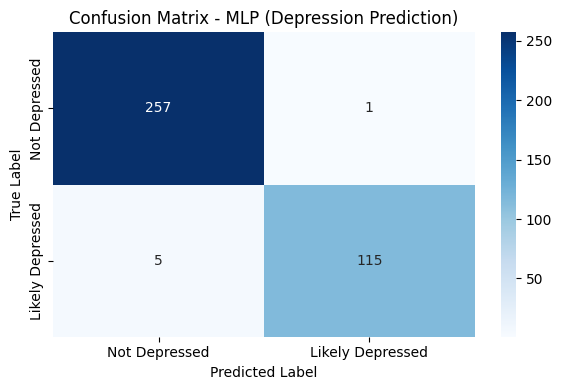

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the MLP classifier
clf_depressed_mlp = MLPClassifier(hidden_layer_sizes=(100, 50),  # You can tune this
                             activation='relu',
                             solver='adam',
                             max_iter=500,
                             random_state=42)

# Train the MLP classifier
clf_depressed_mlp.fit(X_train, y_depressed_train)

# Make predictions
y_depressed_pred_mlp = clf_depressed_mlp.predict(X_test)
print("=== Depression Classifier ===")
print("Accuracy:", accuracy_score(y_depressed_test, y_depressed_pred_mlp))
print("Classification Report:\n", classification_report(y_depressed_test, y_depressed_pred_mlp))
cm = confusion_matrix(y_depressed_test, y_depressed_pred_mlp)
labels = le_depression.classes_ if 'le_depression' in locals() else ['Not Depressed', 'Likely Depressed']

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - MLP (Depression Prediction)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Convert numeric labels back to original class names
actual_risk_labels = le_risk.inverse_transform(y_risk_test)

# Count each class in the test set
unique, counts = np.unique(actual_risk_labels, return_counts=True)

print("=== Actual Risk Group Distribution in Test Set ===")
for label, count in zip(unique, counts):
    print(f"{label}: {count}")

NameError: name 'le_risk' is not defined


=== Risk Group Classifier ===
Accuracy: 0.8386243386243386
Classification Report:
               precision    recall  f1-score   support

   High Risk       0.84      0.38      0.52        42
 Low/No Risk       0.87      0.98      0.92       258
     Treated       0.71      0.63      0.67        78

    accuracy                           0.84       378
   macro avg       0.81      0.66      0.70       378
weighted avg       0.83      0.84      0.82       378



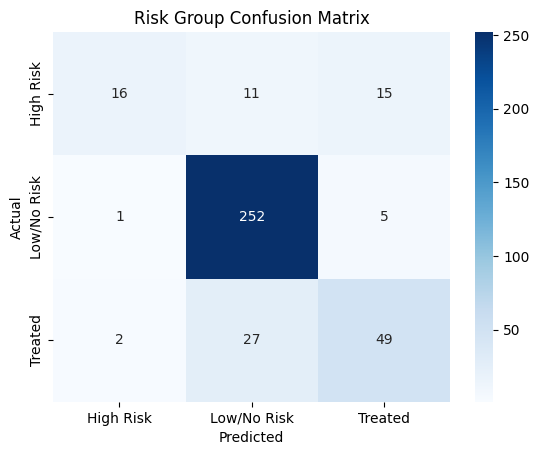

In [ ]:
# Train classifier for risk_group
clf_risk = RandomForestClassifier(random_state=42, class_weight='balanced')
clf_risk.fit(X_train, y_risk_train)
y_risk_pred = clf_risk.predict(X_test)

print("\n=== Risk Group Classifier ===")
print("Accuracy:", accuracy_score(y_risk_test, y_risk_pred))
print("Classification Report:\n", classification_report(y_risk_test, y_risk_pred, target_names=le_risk.classes_))
cm = confusion_matrix(y_risk_test, y_risk_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_risk.classes_, yticklabels=le_risk.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Risk Group Confusion Matrix")
plt.show()

In [ ]:
!pip install xgboost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:10:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Risk Group Classifier (XGBoost) ===
Accuracy: 0.8835978835978836
Classification Report:
               precision    recall  f1-score   support

   High Risk       0.75      0.57      0.65        42
 Low/No Risk       0.92      0.98      0.95       258
     Treated       0.79      0.73      0.76        78

    accuracy                           0.88       378
   macro avg       0.82      0.76      0.79       378
weighted avg       0.88      0.88      0.88       378



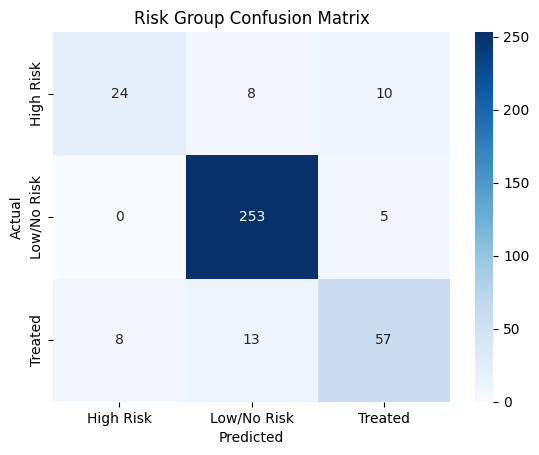

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_risk_train), y=y_risk_train)

# Initialize the XGBoost classifier
clf_risk_xgb = xgb.XGBClassifier(random_state=42, use_label_encoder=False, scale_pos_weight=class_weights)

# Train the XGBoost classifier
clf_risk_xgb.fit(X_train, y_risk_train)

# Make predictions
y_risk_pred_xgb = clf_risk_xgb.predict(X_test)

# Print evaluation metrics
print("\n=== Risk Group Classifier (XGBoost) ===")
print("Accuracy:", accuracy_score(y_risk_test, y_risk_pred_xgb))
print("Classification Report:\n", classification_report(y_risk_test, y_risk_pred_xgb, target_names=le_risk.classes_))
cm = confusion_matrix(y_risk_test, y_risk_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_risk.classes_, yticklabels=le_risk.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Risk Group Confusion Matrix")
plt.show()



=== Risk Group Classifier (SVM) ===
Accuracy: 0.8544973544973545
Classification Report:
               precision    recall  f1-score   support

   High Risk       0.54      0.64      0.59        42
 Low/No Risk       0.96      0.92      0.94       258
     Treated       0.72      0.74      0.73        78

    accuracy                           0.85       378
   macro avg       0.74      0.77      0.75       378
weighted avg       0.87      0.85      0.86       378



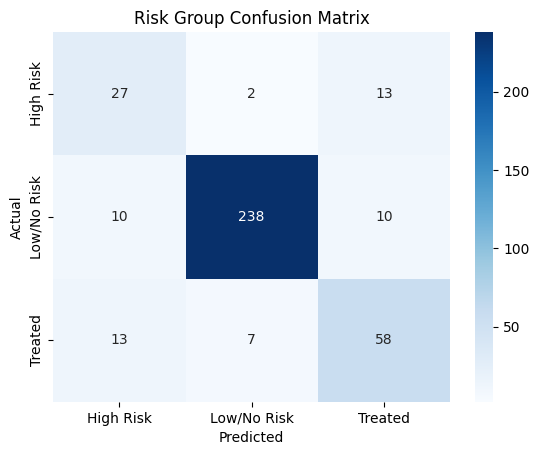

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier with a balanced class weight
clf_risk_svm = SVC(random_state=42, class_weight='balanced')

# Train the SVM classifier
clf_risk_svm.fit(X_train, y_risk_train)

# Make predictions
y_risk_pred_svm = clf_risk_svm.predict(X_test)

# Print evaluation metrics
print("\n=== Risk Group Classifier (SVM) ===")
print("Accuracy:", accuracy_score(y_risk_test, y_risk_pred_svm))
print("Classification Report:\n", classification_report(y_risk_test, y_risk_pred_svm, target_names=le_risk.classes_))
cm = confusion_matrix(y_risk_test, y_risk_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_risk.classes_, yticklabels=le_risk.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Risk Group Confusion Matrix")
plt.show()


=== Risk Group Classifier (MLP) ===
Accuracy: 0.9153439153439153
Classification Report:
               precision    recall  f1-score   support

   High Risk       0.77      0.55      0.64        42
 Low/No Risk       0.97      1.00      0.98       258
     Treated       0.79      0.85      0.81        78

    accuracy                           0.92       378
   macro avg       0.84      0.80      0.81       378
weighted avg       0.91      0.92      0.91       378



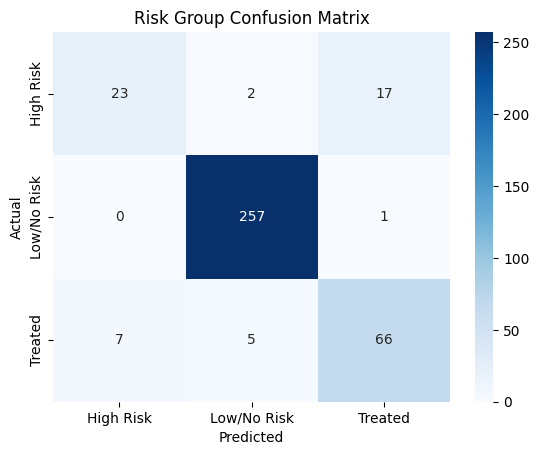

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the MLP classifier
clf_risk_mlp = MLPClassifier(hidden_layer_sizes=(100, 50),  # You can tune this
                             activation='relu',
                             solver='adam',
                             max_iter=500,
                             random_state=42)

# Train the MLP classifier
clf_risk_mlp.fit(X_train, y_risk_train)

# Make predictions
y_risk_pred_mlp = clf_risk_mlp.predict(X_test)

# Print evaluation metrics
print("\n=== Risk Group Classifier (MLP) ===")
print("Accuracy:", accuracy_score(y_risk_test, y_risk_pred_mlp))
print("Classification Report:\n", classification_report(y_risk_test, y_risk_pred_mlp, target_names=le_risk.classes_))
cm = confusion_matrix(y_risk_test, y_risk_pred_mlp)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_risk.classes_, yticklabels=le_risk.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Risk Group Confusion Matrix")
plt.show()

=== Depression Classifier (Decision Tree) ===
Accuracy: 0.873015873015873
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       258
           1       0.81      0.78      0.80       120

    accuracy                           0.87       378
   macro avg       0.86      0.85      0.85       378
weighted avg       0.87      0.87      0.87       378



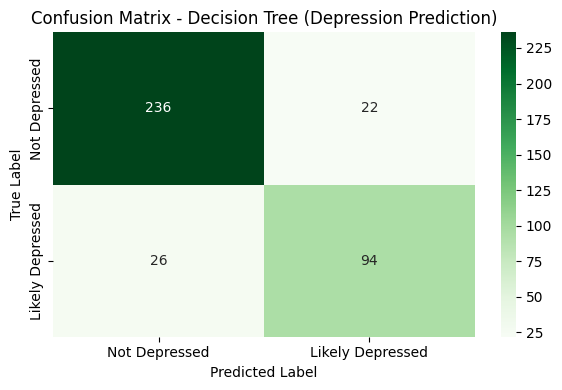

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Decision Tree classifier
clf_dep_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the classifier
clf_dep_tree.fit(X_train, y_depressed_train)

# Make predictions
y_depressed_pred_tree = clf_dep_tree.predict(X_test)

# Evaluation
print("=== Depression Classifier (Decision Tree) ===")
print("Accuracy:", accuracy_score(y_depressed_test, y_depressed_pred_tree))
print("Classification Report:\n", classification_report(y_depressed_test, y_depressed_pred_tree))

# Confusion Matrix
cm = confusion_matrix(y_depressed_test, y_depressed_pred_tree)
labels = ['Not Depressed', 'Likely Depressed']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Decision Tree (Depression Prediction)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



=== Risk Group Classifier (Decision Tree) ===
Accuracy: 0.8068783068783069
Classification Report:
               precision    recall  f1-score   support

   High Risk       0.51      0.45      0.48        42
 Low/No Risk       0.90      0.93      0.91       258
     Treated       0.64      0.60      0.62        78

    accuracy                           0.81       378
   macro avg       0.68      0.66      0.67       378
weighted avg       0.80      0.81      0.80       378



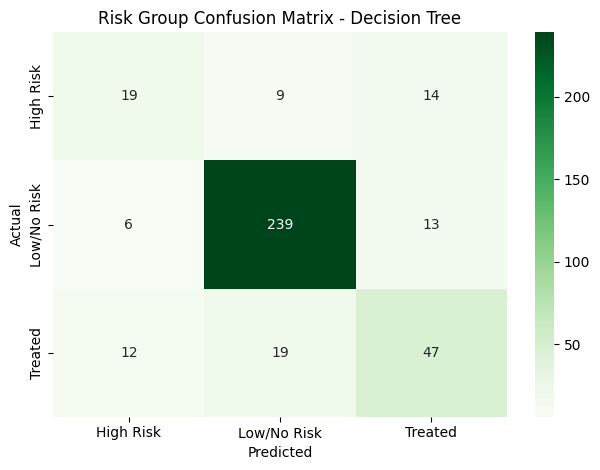

In [ ]:
# Initialize the Decision Tree classifier for risk
clf_risk_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the classifier
clf_risk_dt.fit(X_train, y_risk_train)

# Make predictions
y_risk_pred_dt = clf_risk_dt.predict(X_test)

# Evaluation
print("\n=== Risk Group Classifier (Decision Tree) ===")
print("Accuracy:", accuracy_score(y_risk_test, y_risk_pred_dt))
print("Classification Report:\n", classification_report(y_risk_test, y_risk_pred_dt, target_names=le_risk.classes_))

# Confusion Matrix
cm = confusion_matrix(y_risk_test, y_risk_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=le_risk.classes_, yticklabels=le_risk.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Risk Group Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()


=== Depression Classifier (Logistic Regression) ===
Accuracy: 0.9814814814814815
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       258
           1       0.95      0.99      0.97       120

    accuracy                           0.98       378
   macro avg       0.97      0.98      0.98       378
weighted avg       0.98      0.98      0.98       378



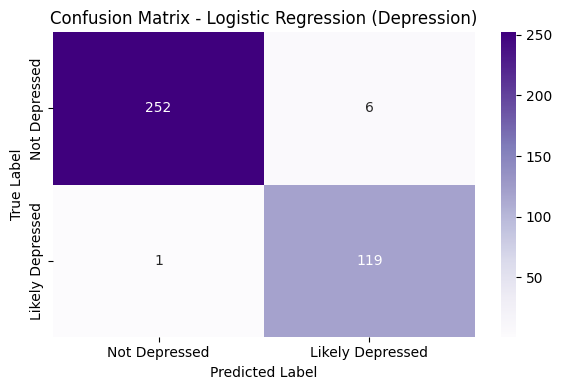

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Logistic Regression with balanced class weight
clf_depression_log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the model
clf_depression_log.fit(X_train, y_depressed_train)

# Predict
y_depressed_pred_log = clf_depression_log.predict(X_test)

# Evaluation
print("=== Depression Classifier (Logistic Regression) ===")
print("Accuracy:", accuracy_score(y_depressed_test, y_depressed_pred_log))
print("Classification Report:\n", classification_report(y_depressed_test, y_depressed_pred_log))

# Confusion Matrix
cm = confusion_matrix(y_depressed_test, y_depressed_pred_log)
labels = le_depression.classes_ if 'le_depression' in locals() else ['Not Depressed', 'Likely Depressed']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Logistic Regression (Depression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



=== Risk Group Classifier (Logistic Regression) ===
Accuracy: 0.8756613756613757
Classification Report:
               precision    recall  f1-score   support

   High Risk       0.56      0.57      0.56        42
 Low/No Risk       1.00      0.94      0.97       258
     Treated       0.70      0.82      0.76        78

    accuracy                           0.88       378
   macro avg       0.75      0.78      0.76       378
weighted avg       0.89      0.88      0.88       378



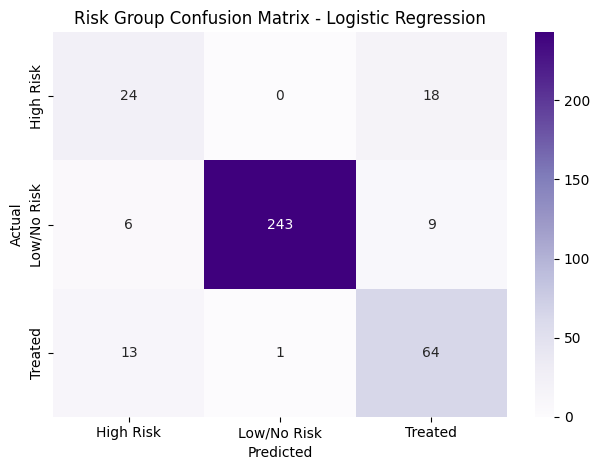

In [ ]:
# Initialize Logistic Regression for Risk Group
clf_risk_log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the model
clf_risk_log.fit(X_train, y_risk_train)

# Predict
y_risk_pred_log = clf_risk_log.predict(X_test)

# Evaluation
print("\n=== Risk Group Classifier (Logistic Regression) ===")
print("Accuracy:", accuracy_score(y_risk_test, y_risk_pred_log))
print("Classification Report:\n", classification_report(y_risk_test, y_risk_pred_log, target_names=le_risk.classes_))

# Confusion Matrix
cm = confusion_matrix(y_risk_test, y_risk_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=le_risk.classes_, yticklabels=le_risk.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Risk Group Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# Prepare Data
# -------------------------
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)  # shape: [batch, channel, features]
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_depressed_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_depressed_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# -------------------------
# Define CNN Model
# -------------------------
class TabularCNN(nn.Module):
    def __init__(self, input_features):
        super(TabularCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(2)
        self.fc1 = nn.Linear((input_features // 2) * 16, 64)
        self.fc2 = nn.Linear(64, 2)  # Binary classification

    def forward(self, x):
        x = self.relu(self.conv1(x))      # [batch, 16, features]
        x = self.pool(x)                  # [batch, 16, features/2]
        x = x.view(x.size(0), -1)         # Flatten
        x = self.relu(self.fc1(x))
        return self.fc2(x)

# -------------------------
# Initialize and Train
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TabularCNN(X_train.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(20):  # Train for 10 epochs
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/20, Loss: {loss.item():.4f}")

# -------------------------
# Evaluate
# -------------------------
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(batch_y.numpy())

print("\n=== CNN Classifier (Depression) ===")
print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Classification Report:\n", classification_report(all_labels, all_preds))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Depressed', 'Likely Depressed'], yticklabels=['Not Depressed', 'Likely Depressed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN (Depression)")
plt.tight_layout()
plt.show()


NameError: name 'X_train' is not defined

Epoch 1/20, Loss: 1.1570
Epoch 2/20, Loss: 0.6422
Epoch 3/20, Loss: 0.5556
Epoch 4/20, Loss: 0.6276
Epoch 5/20, Loss: 0.5947
Epoch 6/20, Loss: 0.7937
Epoch 7/20, Loss: 0.5328
Epoch 8/20, Loss: 0.5825
Epoch 9/20, Loss: 0.6613
Epoch 10/20, Loss: 0.5399
Epoch 11/20, Loss: 0.3327
Epoch 12/20, Loss: 0.4494
Epoch 13/20, Loss: 0.5031
Epoch 14/20, Loss: 0.2962
Epoch 15/20, Loss: 0.3591
Epoch 16/20, Loss: 0.2884
Epoch 17/20, Loss: 0.4155
Epoch 18/20, Loss: 0.3244
Epoch 19/20, Loss: 0.2742
Epoch 20/20, Loss: 0.2718

=== CNN Classifier (Risk) ===
Accuracy: 0.8544973544973545
Classification Report:
               precision    recall  f1-score   support

   High Risk       0.70      0.45      0.55        42
 Low/No Risk       0.89      0.99      0.94       258
     Treated       0.74      0.63      0.68        78

    accuracy                           0.85       378
   macro avg       0.78      0.69      0.72       378
weighted avg       0.84      0.85      0.84       378



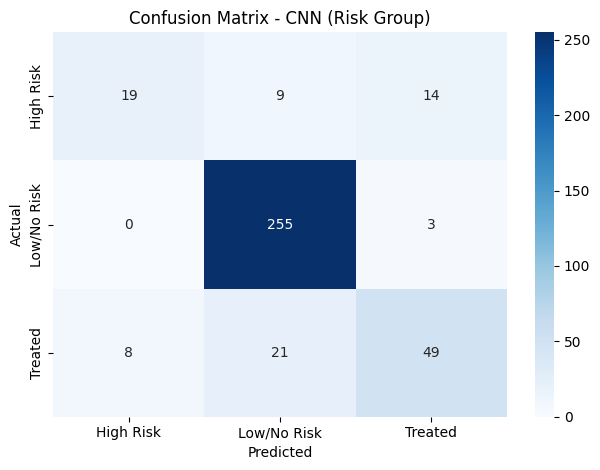

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------
# Prepare Data
# -------------------------
# Ensure input tensors have the correct shape
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)  # Shape: [batch_size, 1, features]
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)    # Shape: [batch_size, 1, features]
y_train_tensor = torch.tensor(y_risk_train, dtype=torch.long)  # No need for .values if numpy array
y_test_tensor = torch.tensor(y_risk_test, dtype=torch.long)    # Same as above

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# -------------------------
# Define CNN Model
# -------------------------
class TabularCNN(nn.Module):
    def __init__(self, input_features):
        super(TabularCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(2)
        self.fc1 = nn.Linear((input_features // 2) * 16, 64)  # Adjust to feature size after pooling
        self.fc2 = nn.Linear(64, len(le_risk.classes_))  # Adjust output size to number of risk classes

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten for fully connected layer
        x = self.relu(self.fc1(x))
        return self.fc2(x)

# -------------------------
# Train the Model
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TabularCNN(X_train.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(20):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/20, Loss: {loss.item():.4f}")

# -------------------------
# Evaluate the Model
# -------------------------
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(batch_y.numpy())

print("\n=== CNN Classifier (Risk) ===")
print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=le_risk.classes_))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_risk.classes_, yticklabels=le_risk.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN (Risk Group)")
plt.tight_layout()
plt.show()


Epoch 1/20, Loss: 0.9238
Epoch 2/20, Loss: 0.8413
Epoch 3/20, Loss: 0.6750
Epoch 4/20, Loss: 0.4155
Epoch 5/20, Loss: 0.2314
Epoch 6/20, Loss: 0.3879
Epoch 7/20, Loss: 0.1878
Epoch 8/20, Loss: 0.1012
Epoch 9/20, Loss: 0.1385
Epoch 10/20, Loss: 0.1844
Epoch 11/20, Loss: 0.0289
Epoch 12/20, Loss: 0.2067
Epoch 13/20, Loss: 0.1221
Epoch 14/20, Loss: 0.0829
Epoch 15/20, Loss: 0.2848
Epoch 16/20, Loss: 0.1421
Epoch 17/20, Loss: 0.3537
Epoch 18/20, Loss: 0.1200
Epoch 19/20, Loss: 0.2884
Epoch 20/20, Loss: 0.1984

=== LSTM Classifier (Risk) ===
Accuracy: 0.9285714285714286
Classification Report:
               precision    recall  f1-score   support

   High Risk       0.84      0.50      0.63        42
 Low/No Risk       0.99      1.00      0.99       258
     Treated       0.78      0.92      0.85        78

    accuracy                           0.93       378
   macro avg       0.87      0.81      0.82       378
weighted avg       0.93      0.93      0.92       378



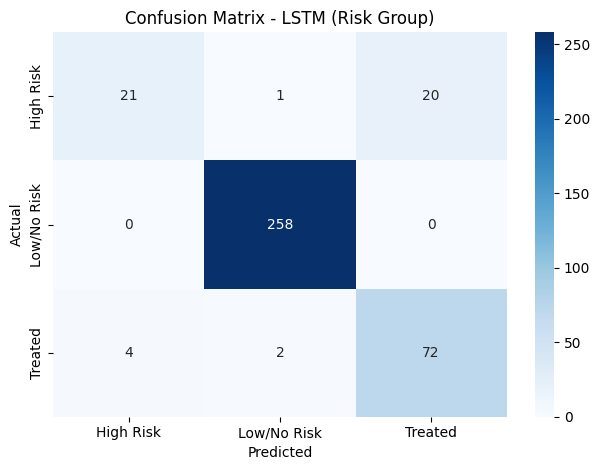

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------
# Prepare Data
# -------------------------
# Ensure input tensors have the correct shape
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)  # Shape: [batch_size, 1, features]
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)    # Shape: [batch_size, 1, features]
y_train_tensor = torch.tensor(y_risk_train, dtype=torch.long)  # No need for .values if numpy array
y_test_tensor = torch.tensor(y_risk_test, dtype=torch.long)    # Same as above

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# -------------------------
# Define LSTM Model
# -------------------------
class TabularLSTM(nn.Module):
    def __init__(self, input_features, hidden_size=64, num_layers=2, output_classes=2):
        super(TabularLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=input_features, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_classes)  # Adjust output size to number of risk classes

    def forward(self, x):
        # LSTM expects input shape (batch_size, seq_length, input_size)
        x, (hn, cn) = self.lstm(x)
        x = x[:, -1, :]  # Get the output of the last time step
        x = self.relu(self.fc1(x))
        return self.fc2(x)

# -------------------------
# Train the Model
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TabularLSTM(X_train.shape[1], output_classes=len(le_risk.classes_)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(20):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/20, Loss: {loss.item():.4f}")

# -------------------------
# Evaluate the Model
# -------------------------
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(batch_y.numpy())

print("\n=== LSTM Classifier (Risk) ===")
print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=le_risk.classes_))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_risk.classes_, yticklabels=le_risk.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM (Risk Group)")
plt.tight_layout()
plt.show()


Epoch 1/20, Loss: 0.6411
Epoch 2/20, Loss: 0.5313
Epoch 3/20, Loss: 0.3355
Epoch 4/20, Loss: 0.1017
Epoch 5/20, Loss: 0.0086
Epoch 6/20, Loss: 0.0143
Epoch 7/20, Loss: 0.0309
Epoch 8/20, Loss: 0.0180
Epoch 9/20, Loss: 0.0034
Epoch 10/20, Loss: 0.0139
Epoch 11/20, Loss: 0.0011
Epoch 12/20, Loss: 0.0009
Epoch 13/20, Loss: 0.0056
Epoch 14/20, Loss: 0.0010
Epoch 15/20, Loss: 0.0004
Epoch 16/20, Loss: 0.0014
Epoch 17/20, Loss: 0.0006
Epoch 18/20, Loss: 0.0002
Epoch 19/20, Loss: 0.0002
Epoch 20/20, Loss: 0.0000

=== LSTM Classifier (Depression) ===
Accuracy: 0.9947089947089947
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       258
           1       1.00      0.98      0.99       120

    accuracy                           0.99       378
   macro avg       1.00      0.99      0.99       378
weighted avg       0.99      0.99      0.99       378



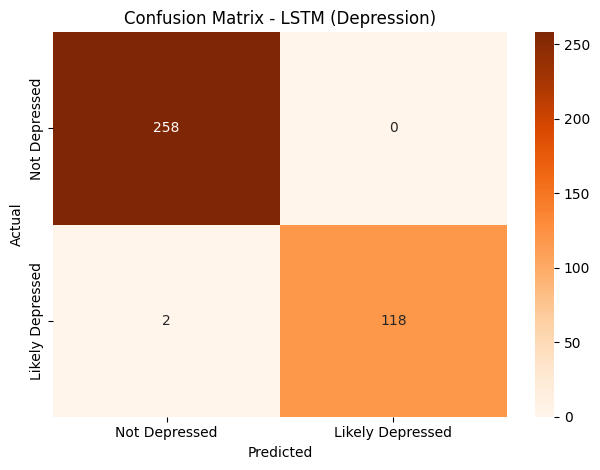

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# Prepare Data
# -------------------------
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)  # shape: [batch, channel, features]
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_depressed_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_depressed_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# -------------------------
# Define LSTM Model
# -------------------------
class TabularLSTM(nn.Module):
    def __init__(self, input_features, hidden_size=64, num_layers=2, output_classes=2):
        super(TabularLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=input_features, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_classes)  # Binary classification (Likely Depressed / Not Depressed)

    def forward(self, x):
        # LSTM expects input shape (batch_size, seq_length, input_size)
        x, (hn, cn) = self.lstm(x)
        x = x[:, -1, :]  # Get the output of the last time step
        x = self.relu(self.fc1(x))
        return self.fc2(x)

# -------------------------
# Initialize and Train
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TabularLSTM(X_train.shape[1], output_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
for epoch in range(20):  # Train for 20 epochs
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/20, Loss: {loss.item():.4f}")

# -------------------------
# Evaluate
# -------------------------
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(batch_y.numpy())

print("\n=== LSTM Classifier (Depression) ===")
print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Classification Report:\n", classification_report(all_labels, all_preds))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Depressed', 'Likely Depressed'], yticklabels=['Not Depressed', 'Likely Depressed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM (Depression)")
plt.tight_layout()
plt.show()
